### 对应的理论在《统计学习方法》第301页
---
将数据转换成前N个主成分的伪代码如下：
```python
去除平均值
计算协方差矩阵
计算协方差矩阵的特征值和特征向量
将特征值从小到大排序
保留最上面的N个特征向量
将数据转换到上述N个特征向量构建的新空间中
```
---
#### 程序清单13-1 PCA算法

In [16]:
import numpy as np


def loadDataSet(filename,delim="\t"):
    fr=open(filename)
    stringArr=[line.strip().split(delim) for line in fr.readlines()]
    datArr=[list(map(float,line)) for line in stringArr]
    return datArr


def pca(datMat,topfeat=9999999):
    meanVals=np.mean(datMat,axis=0)
    meanRemoved=datMat-meanVals
    convMat=np.cov(meanRemoved,rowvar=0)    # 计算协方差矩阵
    eigVals,eigVects=np.linalg.eig(np.mat(convMat))    # 计算特征值与特征向量
    eigValInd=np.argsort(eigVals)    # 从小到大排序的特征值索引
    eigValInd=eigValInd[:-(topfeat+1):-1]    # 从大到小的
    redEigVects=eigVects[:,eigValInd]    # 对应特征向量排序
    lowDataMat=meanRemoved*redEigVects    # 降维后的数据 from《统计学习方法》式16.5
    reconMat=(lowDataMat*redEigVects.T)+meanVals
    return lowDataMat,reconMat


dataMat=loadDataSet('D:\\机器学习实战代码\\machinelearninginaction\\Ch13\\testSet.txt')
lowMat,reconMat=pca(dataMat,1)

### 利用matplotlib可视化一下

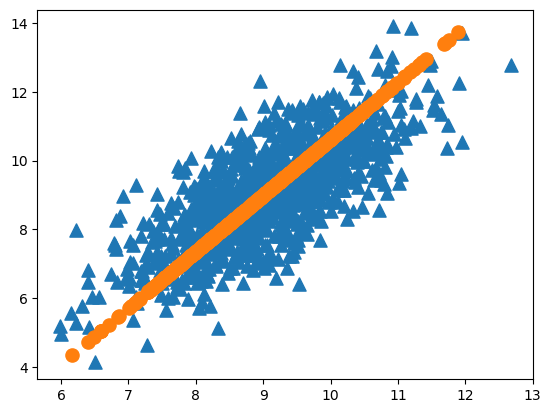

In [15]:
import matplotlib.pyplot as plt


fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(np.array(dataMat)[:,0],np.array(dataMat)[:,1],marker='^',s=90)
ax.scatter(np.array(reconMat)[:,0],np.array(reconMat)[:,1],marker='o',s=90)

## 13.3 利用PCA对半导体制造数据降维
---
#### 程序清单13-2 将NaN替换成平均值的函数

In [17]:
def replaceNanWithMean():
    datMat=loadDataSet('D:\\机器学习实战代码\\machinelearninginaction\\Ch13\\secom.data',' ')
    datMat=np.array(dataMat)
    numFeat=datMat.shape[1]
    for i in range(numFeat):
        meanVal=np.mean(datMat[:,i][~np.isnan(datMat[:,i])])
        datMat[:,i][np.isnan(datMat[:,i])]=meanVal
    return datMat


dataMat=replaceNanWithMean()

False